In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fertility_rate = pd.read_csv('./data_sets/')

In [86]:
fr_clean = fertility_rate_df_average[['Country Code', 'Fertility Rate Avg']]

In [87]:
together = pd.merge(endangered_languages, fr_clean,
                    left_on='Country codes alpha 3', right_on='Country Code', how='inner')

In [91]:
together.tail()

,Name in English,Countries,Country codes alpha 3,Degree of endangerment,Number of speakers,Latitude,Longitude,Country Code,Fertility Rate Avg
2693,Sei,Sierra Leone,SLE,Extinct,0.0,7.5857,-12.5354,SLE,6.256426
2694,Island Carib,Dominica,DMA,Extinct,0.0,15.4325,-61.2817,DMA,2.888571
2695,Gottscheerish,Slovenia,SVN,Critically endangered,NaN,45.6332,14.8123,SVN,1.768704
2696,Jeju,Republic of Korea,KOR,Critically endangered,NaN,33.3671,126.4974,KOR,2.622148
2697,Scanian,"Denmark, Sweden",DNK,Vulnerable,NaN,55.7240,13.6614,DNK,1.858889


In [93]:
degree = together.groupby('Degree of endangerment')

In [106]:
severely_endangered = degree.get_group('Severely endangered')

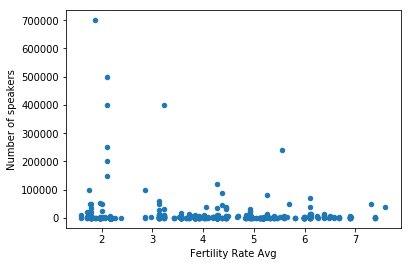

In [107]:
severely_endangered.plot(kind='scatter', y='Number of speakers', x='Fertility Rate Avg')
plt.show()